Context Length Stats:
 count    34726.000000
mean       782.680844
std        349.424414
min        157.000000
25%        577.000000
50%        704.000000
75%        915.000000
max       4063.000000
Name: context_length, dtype: float64

Question Length Stats:
 count    34726.000000
mean        60.183522
std         21.054155
min         12.000000
25%         45.000000
50%         57.000000
75%         72.000000
max        197.000000
Name: question_length, dtype: float64

Answer Length Stats:
 count    34726.000000
mean        18.732592
std         18.330269
min          1.000000
25%          7.000000
50%         13.000000
75%         22.000000
max        160.000000
Name: answer_length, dtype: float64

Missing Values:
 title              0
context            0
question           0
answer_text        0
answer_start       0
question_id        0
context_length     0
question_length    0
answer_length      0
dtype: int64


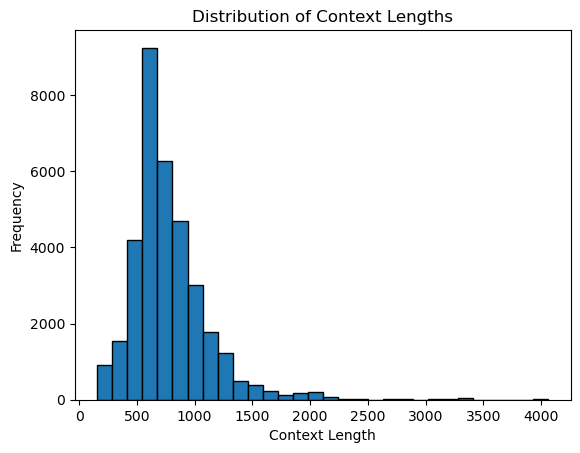

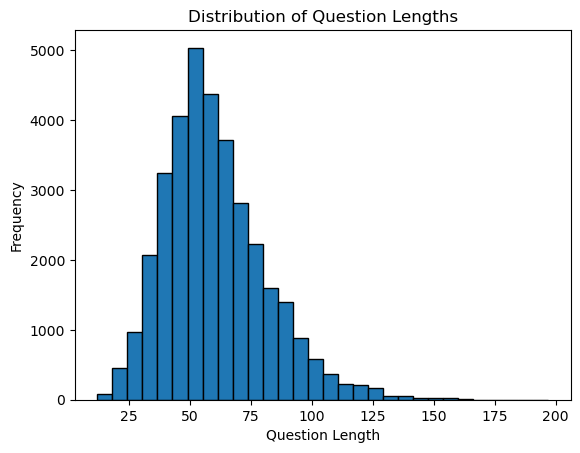

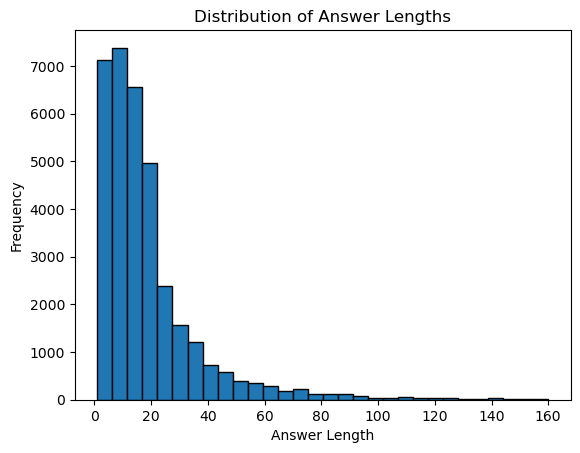

In [5]:
##  Final Project EDA with dev-v1.1
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dev-v1.1.json file
file_path = 'C:/USD/Natural Language Processing and GenAI AAI 520/Final Project/archive/dev-v1.1.json'

## Open and parse the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract and flatten the relevant data into a DataFrame
rows = []
for article in data['data']:
    title = article['title']
    for paragraph in article['paragraphs']:
        context = paragraph['context']
        for qa in paragraph['qas']:
            question = qa['question']
            id_ = qa['id']
            for answer in qa['answers']:
                rows.append({
                    'title': title,
                    'context': context,
                    'question': question,
                    'answer_text': answer['text'],
                    'answer_start': answer['answer_start'],
                    'question_id': id_
                })

# Create a DataFrame
df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
df.head()

#  Display summary Statistics
# Analyze lengths of context, question, and answer text
df['context_length'] = df['context'].apply(len)
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer_text'].apply(len)

# Summary statistics for the lengths
context_length_stats = df['context_length'].describe()
question_length_stats = df['question_length'].describe()
answer_length_stats = df['answer_length'].describe()

# Check for missing values
missing_values = df.isnull().sum()

# Display the summary statistics and missing value check
print("Context Length Stats:\n", context_length_stats)
print("\nQuestion Length Stats:\n", question_length_stats)
print("\nAnswer Length Stats:\n", answer_length_stats)
print("\nMissing Values:\n", missing_values)

#  Visualizing Data

# Plot context length distribution
plt.hist(df['context_length'], bins=30, edgecolor='black')
plt.title('Distribution of Context Lengths')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

# Plot question length distribution
plt.hist(df['question_length'], bins=30, edgecolor='black')
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

# Plot answer length distribution
plt.hist(df['answer_length'], bins=30, edgecolor='black')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()
